In [1]:
from src.config import Config
from src.data.big_query_loader import BigQueryLoader

assignment_activity = BigQueryLoader.load_data(
    query_file="assignment_activity.sql", parquet_file="assignment_activity"
)
historical_activity = BigQueryLoader.load_data(
    query_file="historical_activity.sql", parquet_file="historical_activity"
)

DATA EXIST, IS LOADING FROM LOCAL ...
DATA EXIST, IS LOADING FROM LOCAL ...


In [2]:
from src.data.feature_extraction import get_assignment_features

historical_activity = get_assignment_features(historical_activity, "pre-treatment")
historical_activity["avg_purchase"] = historical_activity["avg_purchase"].fillna(0)

## No Customer common between variations

In [3]:
# assignment_activity.groupby('playerid').filter(lambda g: len(g)>1)

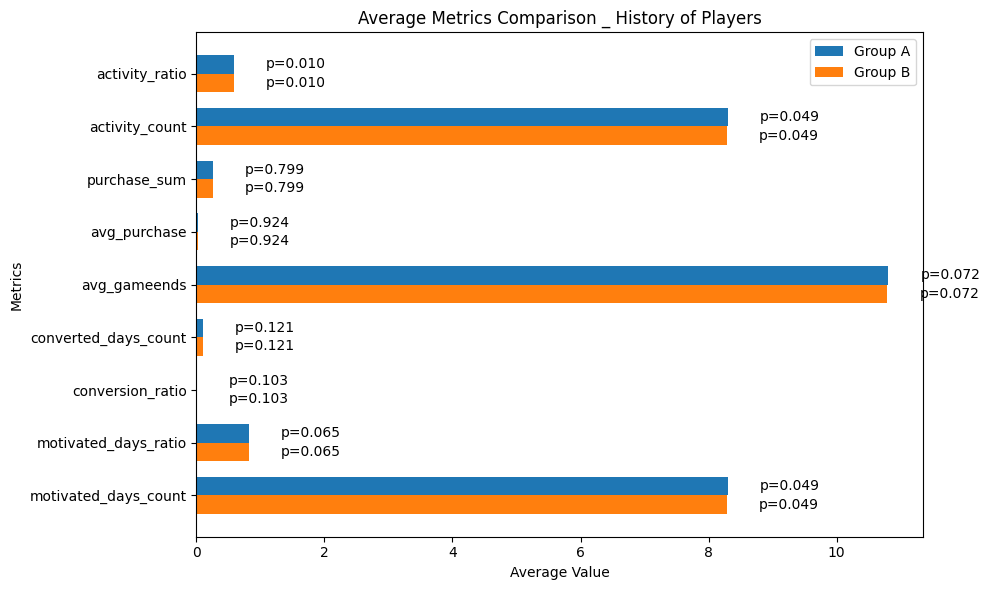

In [11]:
from src.utility.statistics import calc_ttest, calc_chiSq_test
from src.utility.plot import plot_stats

player_features = ["age_in_app"]
player_mean_values, player_p_values = calc_ttest(historical_activity, player_features)
# plot_stats(player_mean_values, player_p_values, "Players Features")

historical_mean_values, historical_p_values = calc_ttest(historical_activity)
plot_stats(historical_mean_values, historical_p_values, "History of Players")

In [5]:
player_mean_values

,age_in_app
abtest_group,
A,142.943370
B,142.912342


In [6]:
historical_mean_values

,activity_ratio,activity_count,purchase_sum,avg_purchase,avg_gameends,converted_days_count,conversion_ratio,motivated_days_ratio,motivated_days_count
abtest_group,,,,,,,,,
A,0.586148,8.297611,0.253807,0.025093,10.806859,0.10058,0.00994,0.819644,8.296167
B,0.585557,8.290839,0.255166,0.02514,10.792747,0.099637,0.009844,0.819092,8.289393


In [7]:
calc_chiSq_test(historical_activity, Config.VARIATION, "converted_before_assignment")

Chi-square statistic: 3.234326722397733
p-value: 0.072109937478918
Degrees of freedom: 1
Expected frequencies: [[8069819.07439085  195790.92560915]
 [2016520.92560915   48925.07439085]]


In [8]:
calc_chiSq_test(historical_activity, Config.VARIATION, "converted_after_assignment")

Chi-square statistic: 2.7006079831548098
p-value: 0.1003099876287097
Degrees of freedom: 1
Expected frequencies: [[8232641.34788254   32968.65211746]
 [2057207.65211746    8238.34788254]]


In [13]:
historical_activity.groupby(Config.VARIATION)['converted_after_assignment'].mean()

abtest_group
A    0.003972
B    0.004053
Name: converted_after_assignment, dtype: float64

In [9]:
calc_chiSq_test(historical_activity, Config.VARIATION, "never_converted")

Chi-square statistic: 1.0679326157316475
p-value: 0.30141288624706913
Degrees of freedom: 1
Expected frequencies: [[ 228759.57772661 8036850.42227339]
 [  57163.42227339 2008282.57772661]]


In [12]:
historical_activity.groupby(Config.VARIATION)['never_converted'].mean()

abtest_group
A    0.972298
B    0.972430
Name: never_converted, dtype: float64